In [107]:
import opendatasets as od

#Data analysis
import pandas as pd
import numpy as np

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#ML 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Familiarize with dataset

In [108]:
od.download("https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading data-science-job-salaries.zip to .\data-science-job-salaries


100%|██████████| 7.37k/7.37k [00:00<00:00, 2.52MB/s]

In [109]:
data = pd.read_csv("data-science-job-salaries\ds_salaries.csv")

In [110]:
data.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [111]:
data.columns.values

array(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'], dtype=object)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [113]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### Dataset modelling

In [114]:
data.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)

In [115]:
data.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [116]:
label_encoder = LabelEncoder()

# Encode categorical columns
data['experience_level_encoded'] = label_encoder.fit_transform(data['experience_level'])
data['employment_type_encoded'] = label_encoder.fit_transform(data['employment_type'])
data['job_title_encoded'] = label_encoder.fit_transform(data['job_title'])
data['employee_residence_encoded'] = label_encoder.fit_transform(data['employee_residence'])
data['company_location_encoded'] = label_encoder.fit_transform(data['company_location'])
data['company_size_encoded'] = label_encoder.fit_transform(data['company_size'])

data.drop(['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size'], axis=1, inplace=True)
data.head(5)


,work_year,salary_in_usd,remote_ratio,experience_level_encoded,employment_type_encoded,job_title_encoded,employee_residence_encoded,company_location_encoded,company_size_encoded
0,2020,79833,0,2,2,22,14,12,0
1,2020,260000,0,3,2,41,32,29,2
2,2020,109024,50,3,2,7,20,18,1
3,2020,20000,0,2,2,47,23,20,2
4,2020,150000,50,3,2,38,55,48,0


### Split dataset

In [117]:
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Print the shapes of the train and validation sets
print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)


Train data shape: (485, 9)
Validation data shape: (122, 9)


In [118]:
X_train = train_data.drop('salary_in_usd', axis=1)
Y_train = train_data['salary_in_usd']

X_val = val_data.drop('salary_in_usd', axis=1)
Y_val = val_data['salary_in_usd']

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((485, 8), (485,), (122, 8), (122,))

### Evaluate dataset

In [119]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_val)
random_forest.score(X_train, Y_train)

acc_random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest_train)

acc_random_forest_val = round(random_forest.score(X_val, Y_val) * 100, 2)
print(acc_random_forest_val)

82.43
55.94


In [120]:
gradient_boosting = GradientBoostingRegressor(n_estimators=100)
gradient_boosting.fit(X_train, Y_train)
Y_pred = gradient_boosting.predict(X_val)
gradient_boosting.score(X_train, Y_train)

acc_gradient_boosting_train = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_gradient_boosting_train)

acc_gradient_boosting_val = round(random_forest.score(X_val, Y_val) * 100, 2)
print(acc_gradient_boosting_val)


82.43
55.94


### Insights and conclusion

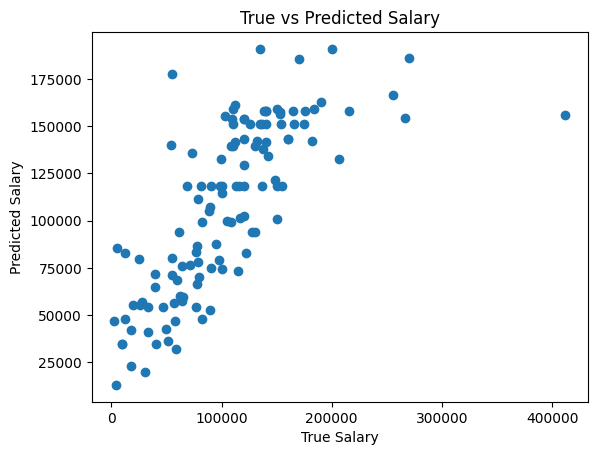

In [121]:
plt.scatter(Y_val, Y_pred)
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('True vs Predicted Salary')
plt.show()


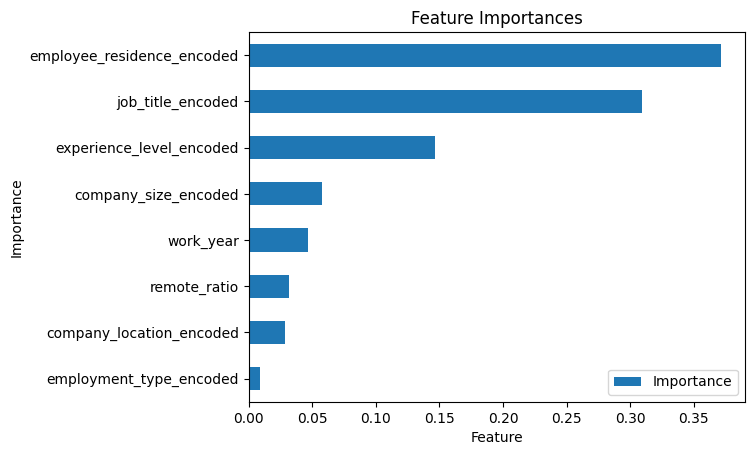

In [122]:
feature_importance = random_forest.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values('Importance')

feature_importance_df.plot(x='Feature', y='Importance', kind='barh')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### Conclusions

- Model overfits because of the dataset being too small (56% val accuracy and 82% train accuracy)

- employee_residence, job_title and experience_level are the most important features

- normalization gave same results

- clustering data before applying regressor could achieve better results